# Dyson Imaging Spectrometer

In [1]:
from optiland import optic, analysis
import numpy as np

In [2]:
class DysonSpectrometer(optic.Optic):
    """Dyson imaging spectrometer
    J. Dyson "Unit Magnification Optical system without Seidel aberrations"
    J. Opt. Soc. Am. 49, 713-716 (1959)

    """

    def __init__(self):
        super().__init__()


        self.add_surface(index=0, radius=np.inf, thickness = 18.0)
        self.add_surface(index=1, radius=135.903, thickness=33.53, material="N-BK7",aperture = 60)
        self.add_surface(index=2, radius=-67.699, thickness=60.668, aperture = 60)
        self.add_surface(index=3, radius=-51.467, thickness=8.413, material="N-BK7", aperture = 50)
        self.add_surface(index=4, radius=-65.577, thickness=39.389, aperture = 50, conic = -0.132)
        self.add_surface(
            index=5, 
            radius=-154.020, 
            thickness=-39.389, 
            material = "mirror", 
            surface_type="grating", 
            grating_order = 1, 
            grating_period = 10.0, 
            groove_grating_angle = 0.0*np.pi,
            is_stop=True,
            )
        self.add_surface(index=6, radius=-65.577, thickness=-8.413, material="N-BK7", aperture = 50, conic = -0.132)
        self.add_surface(index=7, radius=-51.467, thickness=-60.668, aperture = 50)
        self.add_surface(index=8, radius=-67.699, thickness=-33.53, material="N-BK7",aperture = 60)
        self.add_surface(index=9, radius=135.903, thickness = -18.0,aperture = 60)
        self.add_surface(index=10)
        
        # add aperture
        self.set_aperture(aperture_type="float_by_stop_size", value=40)
        
        # add field
        self.set_field_type(field_type="object_height")
        self.add_field(x=0,y=0)
        self.add_field(x=10,y=0)
        self.add_field(x=20,y=0)
        #self.add_field(x=-20,y=0)
        
        # add wavelength
        self.add_wavelength(value=0.550, is_primary=True)
        self.add_wavelength(value=0.450)
        self.add_wavelength(value=0.850)

        self.update_paraxial()

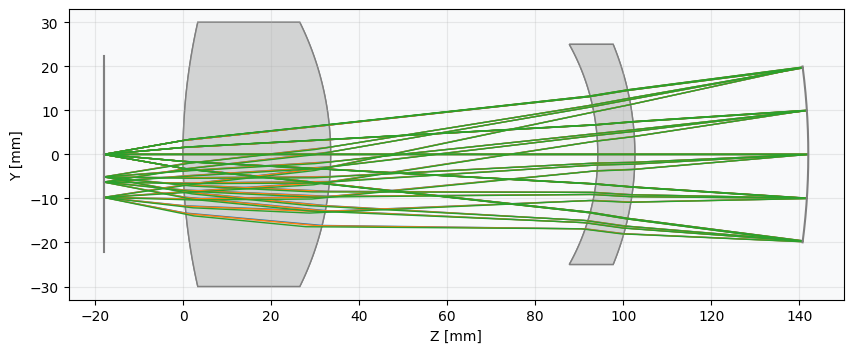

In [3]:
spectrometer = DysonSpectrometer()
_ = spectrometer.draw(wavelengths = [0.450, 0.550, 0.850], num_rays=5)

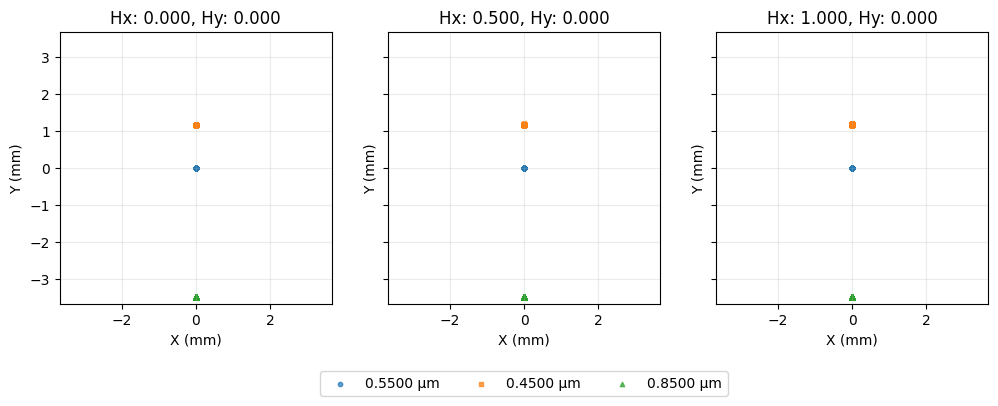

In [6]:
spot = analysis.SpotDiagram(spectrometer,num_rings=12)
_ = spot.view()

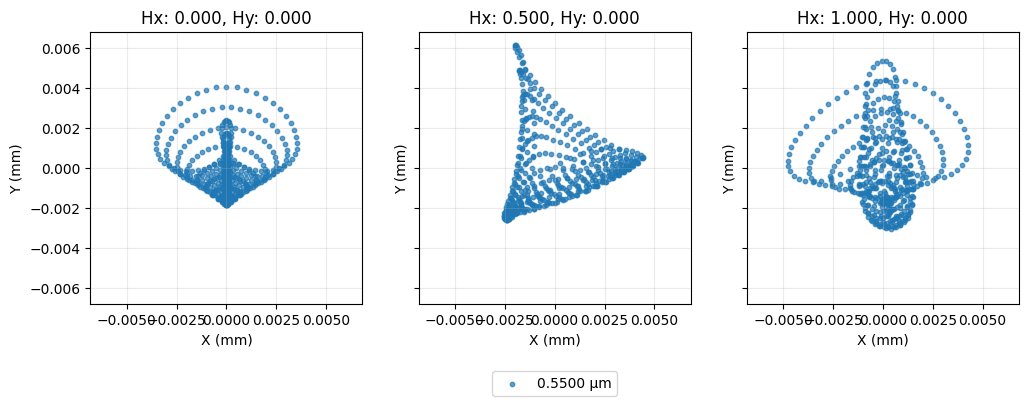

In [7]:
spot = analysis.SpotDiagram(spectrometer,num_rings=12,wavelengths= [0.550])
_ = spot.view()